In [165]:
import dash
from dash import Dash, html, dcc, callback #adding the component to be able to add the graphs/tables
import plotly.express as px
import pandas as pd

import dash_bootstrap_components as dbc
from dash import dash_table

from dash.dependencies import Input, Output, State

In [166]:
app =dash.Dash()

app.layout = html.Div([html.H1('What is the best time and location for our sailing event?', style={'textAlign': 'center', 'color': 'blue'}), 
                       # adding the main title
                       html.H2('Let''s explore the 5 locations of our offices', style ={'paddingLeft': '30px'}),
                       html.H3('Weather')
                      ])

if __name__ == '__main__':
     app.run_server(port=8090)

In [167]:
df = pd.read_csv('./final_data3.csv')

In [168]:
df

,city,country,month_of_year,good_temp_sum,good_avg_sum,no_rain_sum,good_rain_sum,good_wind_sum,good_vis_sum,sunscreen_needed_sum,lat,lon
0,Berlin,Germany,july,25,16,8,8,2,30,31,52.52,13.40
1,Berlin,Germany,august,23,17,7,7,5,30,31,52.52,13.40
2,Berlin,Germany,october,6,1,6,7,5,27,28,52.52,13.40
3,Berlin,Germany,june,26,14,13,13,6,30,30,52.52,13.40
4,Berlin,Germany,september,26,16,22,24,11,30,30,52.52,13.40
5,Berlin,Germany,may,11,1,24,24,3,31,31,52.52,13.40
6,Copenhagen,Denmark,july,19,2,4,4,2,30,31,55.67,12.58
7,Copenhagen,Denmark,june,26,2,17,17,3,30,30,55.67,12.58
8,Copenhagen,Denmark,august,18,1,2,2,2,29,31,55.67,12.58
9,Copenhagen,Denmark,september,16,3,22,23,2,30,30,55.67,12.58


In [169]:
col_drop = ['good_avg_sum','good_rain_sum','good_vis_sum','sunscreen_needed_sum']

In [170]:
df.drop(columns=col_drop, inplace=True)

In [171]:
month_mapping = {
    'may': '05_May',
    'june': '06_June',
    'july': '07_July',
    'august': '08_August',
    'september': '09_September',
    'october': '10_October'
}

for month, prefixed_month in month_mapping.items():
    df['month_of_year'] = df['month_of_year'].str.replace(month, prefixed_month)

In [172]:
df

,city,country,month_of_year,good_temp_sum,no_rain_sum,good_wind_sum,lat,lon
0,Berlin,Germany,07_July,25,8,2,52.52,13.40
1,Berlin,Germany,08_August,23,7,5,52.52,13.40
2,Berlin,Germany,10_October,6,6,5,52.52,13.40
3,Berlin,Germany,06_June,26,13,6,52.52,13.40
4,Berlin,Germany,09_September,26,22,11,52.52,13.40
5,Berlin,Germany,05_May,11,24,3,52.52,13.40
6,Copenhagen,Denmark,07_July,19,4,2,55.67,12.58
7,Copenhagen,Denmark,06_June,26,17,3,55.67,12.58
8,Copenhagen,Denmark,08_August,18,2,2,55.67,12.58
9,Copenhagen,Denmark,09_September,16,22,2,55.67,12.58


In [173]:
df.columns = ['City','Country','Month','Days with good temperature','Non-rainy days','Wind','Latitude','Longitude']

In [174]:
df = df.sort_values(by=['City', 'Month'])

In [175]:
df

,City,Country,Month,Days with good temperature,Non-rainy days,Wind,Latitude,Longitude
5,Berlin,Germany,05_May,11,24,3,52.52,13.40
3,Berlin,Germany,06_June,26,13,6,52.52,13.40
0,Berlin,Germany,07_July,25,8,2,52.52,13.40
1,Berlin,Germany,08_August,23,7,5,52.52,13.40
4,Berlin,Germany,09_September,26,22,11,52.52,13.40
2,Berlin,Germany,10_October,6,6,5,52.52,13.40
10,Copenhagen,Denmark,05_May,4,26,3,55.67,12.58
7,Copenhagen,Denmark,06_June,26,17,3,55.67,12.58
6,Copenhagen,Denmark,07_July,19,4,2,55.67,12.58
8,Copenhagen,Denmark,08_August,18,2,2,55.67,12.58


In [177]:
df_berlin = df[df['City'] == 'Berlin']
df_berlin = df_berlin.sort_values(by='Month', ignore_index=True)

In [178]:
df_copenhagen = df[df['City'] == 'Copenhagen']
df_copenhagen = df_copenhagen.sort_values(by='Month', ignore_index=True)

In [179]:
df_katowice = df[df['City'] == 'Katowice']
df_katowice = df_katowice.sort_values(by='Month', ignore_index=True)

In [180]:
df_tokyo = df[df['City'] == 'Tokyo']
df_tokyo = df_tokyo.sort_values(by='Month', ignore_index=True)

In [181]:
df_la = df[df['City'] == 'Los Angeles']
df_la = df_la.sort_values(by='Month', ignore_index=True)

In [182]:
app =dash.Dash(external_stylesheets=[dbc.themes.SLATE])

d_table_berlin = dash_table.DataTable(
    df_berlin.to_dict('records'),
    [{"name": i, "id": i} for i in df_berlin.columns],
    style_data={'color': 'white', 'backgroundColor': 'black'},
    style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
    style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                 'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                 'marginLeft': 'auto', 'marginRight': 'auto',
                 'marginTop': 0, 'marginBottom': "1"}
)

d_table_copenhagen = dash_table.DataTable(
    df_copenhagen.to_dict('records'),
    [{"name": i, "id": i} for i in df_copenhagen.columns],
    style_data={'color': 'white', 'backgroundColor': 'black'},
    style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
    style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                 'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                 'marginLeft': 'auto', 'marginRight': 'auto',
                 'marginTop': 0, 'marginBottom': "1"}
)

d_table_katowice = dash_table.DataTable(
    df_katowice.to_dict('records'),
    [{"name": i, "id": i} for i in df_katowice.columns],
    style_data={'color': 'white', 'backgroundColor': 'black'},
    style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
    style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                 'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                 'marginLeft': 'auto', 'marginRight': 'auto',
                 'marginTop': 0, 'marginBottom': 0}
)

d_table_tokyo = dash_table.DataTable(
    df_tokyo.to_dict('records'),
    [{"name": i, "id": i} for i in df_tokyo.columns],
    style_data={'color': 'white', 'backgroundColor': 'black'},
    style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
    style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                 'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                 'marginLeft': 'auto', 'marginRight': 'auto',
                 'marginTop': 0, 'marginBottom': 0}
)

d_table_la = dash_table.DataTable(
    df_la.to_dict('records'),
    [{"name": i, "id": i} for i in df_la.columns],
    style_data={'color': 'white', 'backgroundColor': 'black'},
    style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
    style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                 'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                 'marginLeft': 'auto', 'marginRight': 'auto',
                 'marginTop': 0, 'marginBottom': 0}
)


app.layout = html.Div([
    html.H1('What is the best time and location for our sailing event?', style={'textAlign': 'center', 'color': 'blue'}),
    html.H2('Lets explore the 5 locations of our offices', style={'paddingLeft': '30px'}),
    html.Div([
        html.Div('Berlin', style={'backgroundColor': 'coral', 'color': 'white', 'width': '900px',
                                  'marginLeft': 'auto', 'marginRight': 'auto', 'padding': '10px'}),
        d_table_berlin  # Add the Berlin table here
    ]),
    html.Div([
        html.Div('Copenhagen', style={'backgroundColor': 'coral', 'color': 'white', 'width': '900px',
                                      'marginLeft': 'auto', 'marginRight': 'auto','padding': '10px'}),
        d_table_copenhagen  # Add the Copenhagen table here
    ]),
    html.Div([
        html.Div('Katowice', style={'backgroundColor': 'coral', 'color': 'white', 'width': '900px',
                                     'marginLeft': 'auto', 'marginRight': 'auto','padding': '10px'}),
        d_table_katowice  # Add the Katowice table here
    ]),
    html.Div([
        html.Div('Tokyo', style={'backgroundColor': 'coral', 'color': 'white', 'width': '900px',
                                 'marginLeft': 'auto', 'marginRight': 'auto','padding': '10px'}),
        d_table_tokyo  # Add the Tokyo table here
    ]),
    html.Div([
        html.Div('LA', style={'backgroundColor': 'coral', 'color': 'white', 'width': '900px',
                              'marginLeft': 'auto', 'marginRight': 'auto','padding': '10px'}),
        d_table_la  # Add the LA table here
    ]),
],style={'marginBottom': '2px'})

if __name__ == '__main__':
    app.run_server(port=8090)

#```

In [183]:
fig1 = px.bar(df, 
             x='Month', 
             y='Days with good temperature',  
             color='City',
             barmode='group',
             height=300, title = "Good temperature for sailing by Month",)

fig1 = fig1.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white", 
    #margin=dict(l=20, r=20, t=0, b=20)
)
    

graph1 = dcc.Graph(figure=fig1)

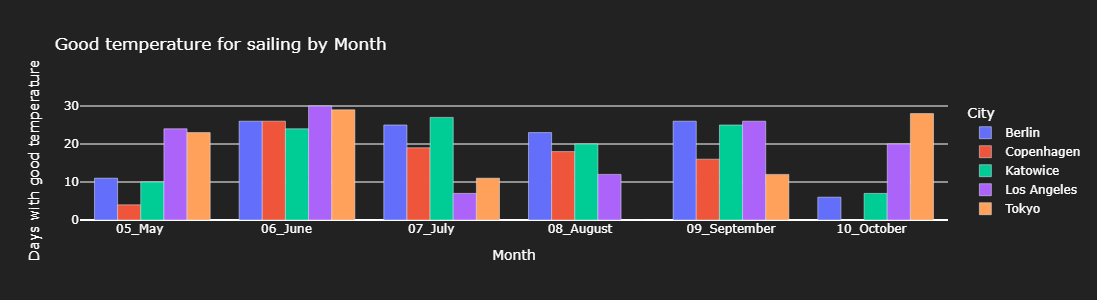

In [184]:
fig1

In [185]:
fig2 = px.bar(df, 
             x='Month', 
             y='Non-rainy days',  
             color='City',
             barmode='group',
             height=300, title = "Non-rainy days by Month",)

fig2 = fig2.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white", 
    #margin=dict(l=20, r=20, t=0, b=20)
)
    

graph2 = dcc.Graph(figure=fig2)

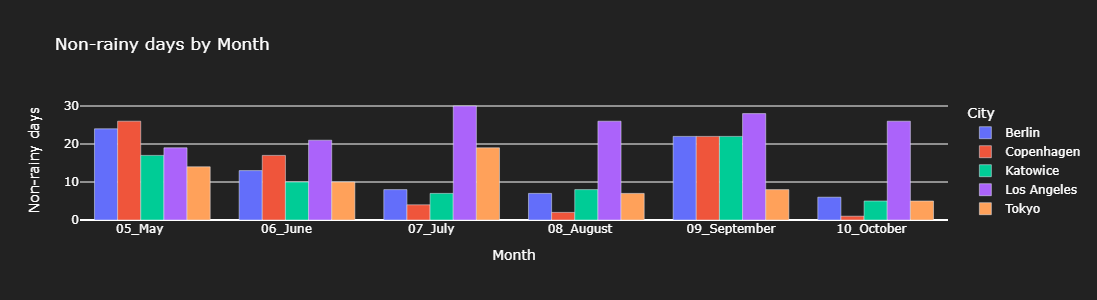

In [186]:
fig2

In [187]:
fig3 = px.bar(df, 
             x='Month', 
             y='Wind',  
             color='City',
             barmode='group',
             height=300, title = "Days with good wind for sailing by Month",)

fig3 = fig3.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white", 
    #margin=dict(l=20, r=20, t=0, b=20)
)
    

graph3 = dcc.Graph(figure=fig3)

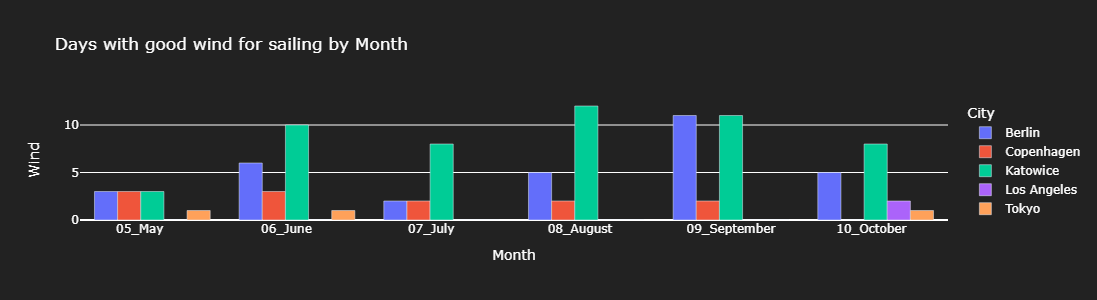

In [188]:
fig3

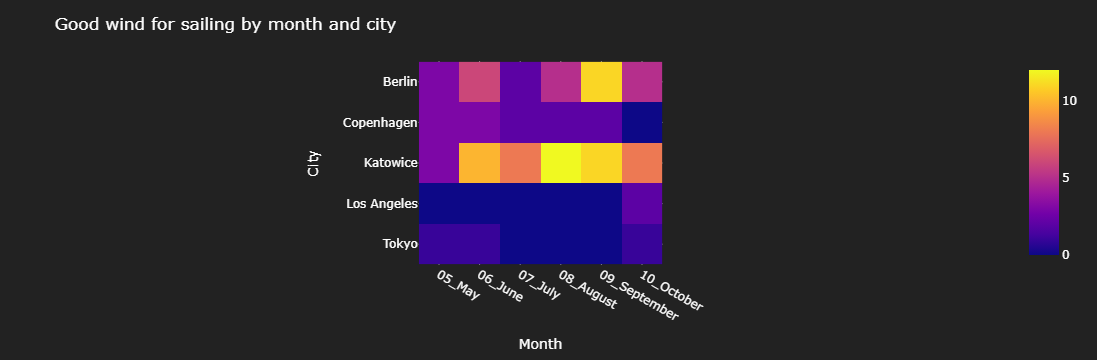

In [189]:
fig4 = px.imshow(df.pivot_table(index='City', columns='Month', values='Wind'), 
                x=list(df['Month'].unique()), 
                y=list(df['City'].unique()))

# Update layout
fig4.update_layout(
    title='Good wind for sailing by month and city',
    xaxis=dict(title='Month'),
    yaxis=dict(title='City'),
    plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white"  # Background color  # Font color
)

# Show the plot
graph4 = dcc.Graph(figure=fig4)
fig4.show()

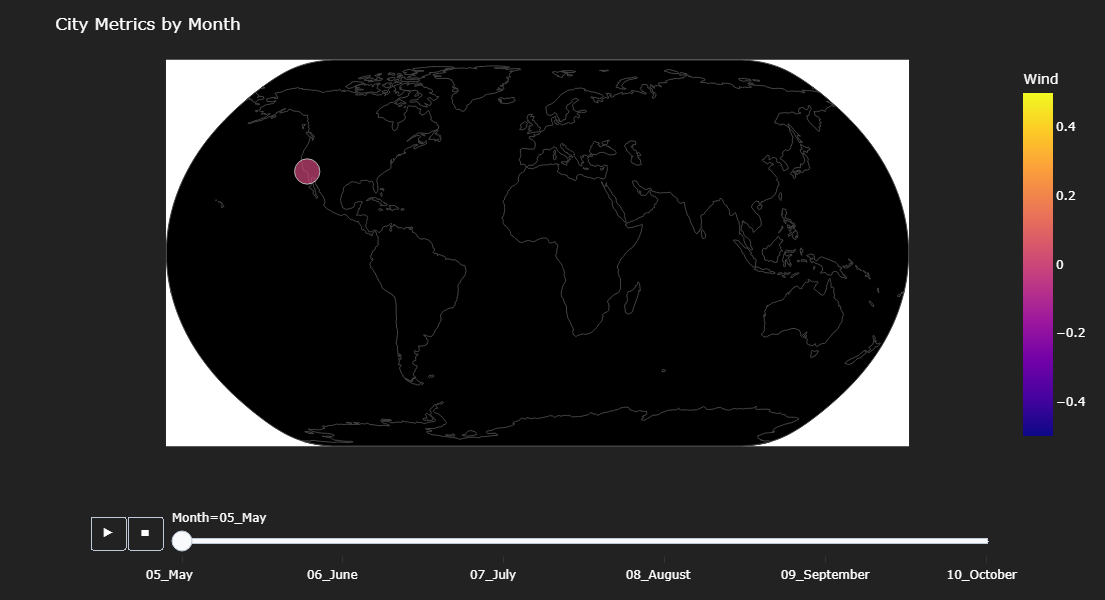

In [249]:
fig6 = px.scatter_geo(df, lat='Latitude', lon='Longitude', color='Wind',
                      hover_name='City', size='Days with good temperature', projection='natural earth',
                      animation_frame='Month')

fig6.update_geos(showcountries=True, countrycolor="Black", showland=True, landcolor="Black",
                 showocean=True, oceancolor="Black", showlakes=True, lakecolor="Black",
                 showrivers=True, rivercolor="Black")

fig6.update_layout(title='City Metrics by Month',
                   plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white",
                   width=1000, height=600)  # Set width and height here

graph6 = dcc.Graph(figure=fig6)
fig6.show()

In [213]:
total_points_df = df.groupby(['City', 'Month'])[['Wind', 'Days with good temperature', 'Non-rainy days']].sum().reset_index()
total_points_df['Total Points'] = total_points_df[['Wind', 'Days with good temperature', 'Non-rainy days']].sum(axis=1)
total_points_df = total_points_df.sort_values(by='Total Points', ascending=False)
total_points_df.head(10)

,City,Month,Wind,Days with good temperature,Non-rainy days,Total Points
4,Berlin,09_September,11,26,22,59
16,Katowice,09_September,11,25,22,58
22,Los Angeles,09_September,0,26,28,54
19,Los Angeles,06_June,0,30,21,51
23,Los Angeles,10_October,2,20,26,48
7,Copenhagen,06_June,3,26,17,46
1,Berlin,06_June,6,26,13,45
13,Katowice,06_June,10,24,10,44
18,Los Angeles,05_May,0,24,19,43
14,Katowice,07_July,8,27,7,42


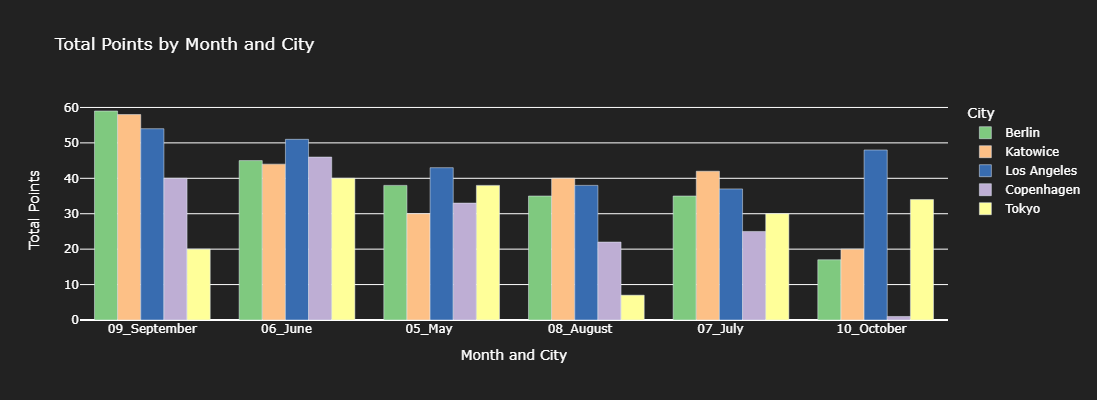

In [229]:
fig7 = px.bar(
    total_points_df,
    x='Month',
    y='Total Points',
    color='City',
    color_discrete_map=color_discrete_map,
    barmode='group',
    height=400,
    title='Total Points by Month and City'
)

# Update layout
fig7.update_layout(
    xaxis_title='Month and City',
    yaxis_title='Total Points',
    plot_bgcolor="#222222",  # Background color
    paper_bgcolor="#222222",  # Paper color
    font_color="#FFFFFF"  # Font color
)

# Create the graph component for total points
graph7 = dcc.Graph(figure=fig7)
fig7

In [248]:
graph = dcc.Graph()
countries =df['City'].unique().tolist() 

app =dash.Dash(external_stylesheets=[dbc.themes.SLATE])

dropdown = dcc.Dropdown(
    options=[
        {'label': 'Berlin', 'value': 'Berlin'},
        {'label': 'Copenhagen', 'value': 'Copenhagen'},
        {'label': 'Katowice', 'value': 'Katowice'},
        {'label': 'Tokyo', 'value': 'Tokyo'},
        {'label': 'Los Angeles', 'value': 'Los Angeles'}
    ],
    value=['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles'],  # Pass as a list
    clearable=False,
    multi=True,
    style={'paddingLeft': '30px', "backgroundColor": "#222222", "color": "#222222"}
)

variables_dropdown = dcc.Dropdown(
    id='variable-dropdown-heatmap',
    options=[
        {'label': 'Wind', 'value': 'Wind'},
        {'label': 'Days with good temperature', 'value': 'Days with good temperature'},
        {'label': 'Non-rainy days', 'value': 'Non-rainy days'}
    ],
    value='Wind',  # Default value
    clearable=False,
    style={'paddingLeft': '30px', "backgroundColor": "#222222", "color": "#222222"}
)

total_points_dropdown = dcc.Dropdown(
    id='total-points-variable-dropdown',
    options=[
        {'label': 'Wind', 'value': 'Wind_Score'},
        {'label': 'Days with good temperature', 'value': 'Temperature_Score'},
        {'label': 'Non-rainy days', 'value': 'Non_rainy_days_Score'}
    ],
    value='Wind_Score',  # Default value
    clearable=False,
    style={'width': '50%', 'paddingLeft': '30px', 'backgroundColor': '#222222', 'color': '#FFFFFF'}
)

df_dict = {
    'Berlin': df_berlin,
    'Copenhagen': df_copenhagen,
    'Katowice': df_katowice,
    'Tokyo': df_tokyo,
    'Los Angeles': df_la
}

table_dict = {}
for city, df in df_dict.items():
    table_dict[city] = dash_table.DataTable(
        id=f'table-{city.lower().replace(" ", "-")}',
        columns=[{"name": i, "id": i} for i in df.columns],
        data=df.to_dict('records'),
        style_data={'color': 'white', 'backgroundColor': 'black'},
        style_header={'backgroundColor': 'rgb(210, 210, 210)', 'color': 'black', 'fontWeight': 'bold'},
        style_table={'minHeight': '400px', 'height': '400px', 'maxHeight': '400px',
                     'minWidth': '900px', 'width': '900px', 'maxWidth': '900px',
                     'marginLeft': 'auto', 'marginRight': 'auto',
                     'marginTop': 0, 'marginBottom': "1"}
    )

city_selection = dcc.RadioItems(
    id='city-selection',
    options=[
        {'label': city, 'value': city} for city in df_dict.keys()
    ],
    value='Berlin',  # Default value
    labelStyle={'display': 'inline-block', 'margin-right': '10px'}
)


app.layout = html.Div([
    html.H1('What is the best time and location for our sailing event?', style={'textAlign': 'center', 'color': '#636EFA'}),
    html.H2("Let's explore the 5 locations of our offices", style={'paddingLeft': '40px'}),
    
    html.Div([  # Table selection container
        html.P("Tables"),
        html.Div([
            city_selection,
            html.Button('Submit', id='submit-button', n_clicks=0, style={'margin-left': '10px'})
        ], style={'margin-left': '40px', 'margin-bottom': '20px'}),
        html.Div(id='table-container')
    ], style={'margin-left': '50px', 'margin-right': '25px'}),
    
    html.Div([  # Graphs and dropdowns container
        html.P("Graphs"),
        html.Div([
            dropdown, 
            graph1,
            graph2,  
            graph3, 
            graph7,
            variables_dropdown,
            graph4,
            graph6
        ])
    ], style={'margin-left': '50px', 'margin-right': '25px'})
])


@app.callback(
    Output('table-container', 'children'),
    [Input('submit-button', 'n_clicks')],
    [Input('city-selection', 'value')]
)
def update_table(n_clicks, selected_city):
    return table_dict[selected_city]


@app.callback(
    Output('table-container', 'children'),
    [Input('city-dropdown', 'value')]
)
def update_table(selected_city):
    selected_df = city_dfs[selected_city]
    return dash_table.DataTable(
        id='city-table',
        columns=[{'name': col, 'id': col} for col in selected_df.columns],
        data=selected_df.to_dict('records'),
        style_table={'overflowX': 'auto'}  # Enable horizontal scroll if needed
    )

@callback(
    Output(graph1, "figure"), 
    Input(dropdown, "value"))

def update_bar_chart(selected_cities):
    if not selected_cities:
        selected_cities = ['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles']
    mask = df["City"].isin(selected_cities)
    fig = px.bar(
        df[mask], 
        x='Month', 
        y='Days with good temperature',
        color='City',
        color_discrete_map = {'Berlin': '#7FC97F',  # Green
                      'Copenhagen': '#BEAED4',  # Purple
                      'Katowice': '#FDC086',  # Orange
                      'Tokyo': '#FFFF99',  # Yellow
                      'Los Angeles': '#386CB0'},  # Blue
        barmode='group',
        height=300,
        title="Good temperatures for sailing by cities",
    )
    fig = fig.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white"
    )
    return fig


@callback(
    Output(graph2, "figure"), 
    Input(dropdown, "value"))

def update_bar_chart(selected_cities):
    if not selected_cities:
        selected_cities = ['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles']
    mask = df["City"].isin(selected_cities)
    fig = px.bar(
        df[mask], 
        x='Month', 
        y='Non-rainy days',
        color='City',
        color_discrete_map = {'Berlin': '#7FC97F',  # Green
                      'Copenhagen': '#BEAED4',  # Purple
                      'Katowice': '#FDC086',  # Orange
                      'Tokyo': '#FFFF99',  # Yellow
                      'Los Angeles': '#386CB0'},  # Blue
        barmode='group',
        height=300,
        title="Non-rainy days by Month",
    )
    fig = fig.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white"
    )
    return fig

@callback(
    Output(graph3, "figure"), 
    Input(dropdown, "value"))

def update_bar_chart(selected_cities):
    if not selected_cities:
        selected_cities = ['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles']
    mask = df["City"].isin(selected_cities)
    fig = px.bar(
        df[mask], 
        x='Month', 
        y='Wind',
        color='City',
        color_discrete_map = {'Berlin': '#7FC97F',  # Green
                      'Copenhagen': '#BEAED4',  # Purple
                      'Katowice': '#FDC086',  # Orange
                      'Tokyo': '#FFFF99',  # Yellow
                      'Los Angeles': '#386CB0'},  # Blue
        barmode='group',
        height=300,
        title="Days with good wind for sailing by Month",
    )
    fig = fig.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white"
    )
    return fig

@callback(
    Output(graph7, "figure"), 
    Input(dropdown, "value"))

def update_bar_chart(selected_cities):
    if not selected_cities:
        selected_cities = ['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles']
    mask = total_points_df["City"].isin(selected_cities)
    fig = px.bar(
        total_points_df[mask], 
        x='Month',
        y='Total Points',
        color='City',
        color_discrete_map = {'Berlin': '#7FC97F',  # Green
                      'Copenhagen': '#BEAED4',  # Purple
                      'Katowice': '#FDC086',  # Orange
                      'Tokyo': '#FFFF99',  # Yellow
                      'Los Angeles': '#386CB0'},  # Blue
        barmode='group',
        height=300,
        title="Total scores",
    )
    fig = fig.update_layout(
        plot_bgcolor="#222222", paper_bgcolor="#222222", font_color="white"
    )
    return fig


@callback(
    Output(graph4, "figure"), 
    Input(dropdown, "value"),
    Input('variable-dropdown-heatmap', 'value')  # Add input for the heatmap dropdown
)
def update_heatmap(selected_cities, variable):
    if not selected_cities:
        selected_cities = ['Berlin', 'Copenhagen', 'Katowice', 'Tokyo', 'Los Angeles']
    mask = df["City"].isin(selected_cities)
    filtered_df = df[mask]
    
    # Ensure the selected variable is numeric
    if variable not in filtered_df.columns:
        return {}
    
    # Create the pivot table based on the selected variable
    pivot_df = filtered_df.pivot_table(index='City', columns='Month', values=variable, aggfunc='mean')

    # Create the heatmap
    fig = px.imshow(pivot_df, labels=dict(x='Month', y='City', color=variable))

    # Update layout
    fig.update_layout(
        title=f'{variable} by Month and City',
        plot_bgcolor="#222222",  # Background color
        paper_bgcolor="#222222",  # Paper color
        font_color="#FFFFFF"  # Font color
    )

    return fig

color_discrete_map = {'Berlin': '#7FC97F',  # Green
                      'Copenhagen': '#BEAED4',  # Purple
                      'Katowice': '#FDC086',  # Orange
                      'Tokyo': '#FFFF99',  # Yellow
                      'Los Angeles': '#386CB0'}  # Blue

if __name__ == '__main__':
     app.run_server(port=8095)